## ANALYTICS III Iris Dataset - Naive Bayes Theorem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## Load dataset

In [9]:
iris_data = load_iris(as_frame = True)

In [13]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

In [14]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>]], dtype=object)

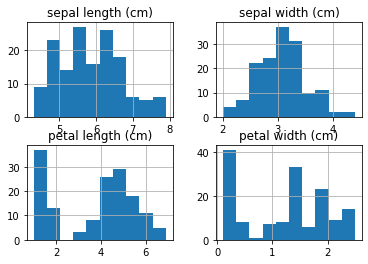

In [17]:
x.hist()

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

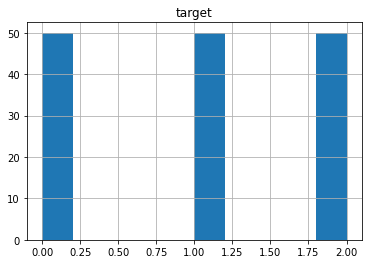

In [18]:
y.hist()

## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=133)

In [57]:
## Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [59]:
std_scaler.fit_transform(x_train,x_test)

array([[-0.99152669,  1.96872963, -1.22808711, -1.22657149],
       [-1.11223429,  0.96303878, -1.40503277, -1.22657149],
       [ 1.18121006,  0.20877065,  0.65933322,  1.36285721],
       [-1.23294189, -1.55118834, -0.40234072, -0.40885716],
       [ 0.09484168, -0.79692021,  0.65933322,  0.40885716],
       [-1.59506468,  1.46588421, -1.75892408, -1.49914293],
       [ 2.14687084, -1.04834292,  1.72100716,  1.36285721],
       [ 0.21554928, -0.04265207,  0.36442379,  0.13628572],
       [-1.11223429, -1.80261106, -0.40234072, -0.40885716],
       [ 0.33625688, -2.05403377,  0.30544191,  0.27257144],
       [-0.02586591, -0.04265207,  0.12849625,  0.27257144],
       [-0.38798871, -0.54549749,  0.54136945,  0.95400005],
       [ 0.93979487,  0.20877065,  0.42340568,  0.27257144],
       [ 0.93979487, -0.04265207,  0.7183151 ,  1.36285721],
       [ 0.93979487,  0.71161607,  1.01322453,  1.63542865],
       [-0.8708191 ,  1.2144615 , -1.46401465, -1.49914293],
       [ 1.18121006,  0.

In [60]:
## Data is distributed normally hence Gaussian Dataset
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(x_train,y_train)

/home/student/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [61]:
y_predict = model.predict(x_test)

In [62]:
y_predict

array([0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2])

In [126]:
#y_test
# for i in range(len(y_predict)):
#       print(y_test[i],y_predict[i])

## Confusion Matrix

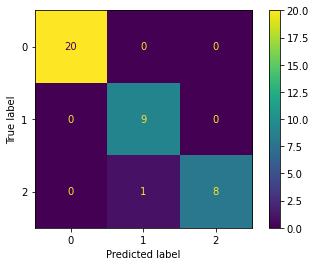

In [125]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict)
cm_d = ConfusionMatrixDisplay(cm).plot()

## Accuracy, Precision

In [124]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [65]:
acc_score = accuracy_score(y_test,y_predict)
acc_score

0.9736842105263158

In [66]:
prec_score = precision_score(y_test,y_predict,average='macro')
prec_score

0.9666666666666667

## User Input

In [74]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

In [75]:
prediction = model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 1]


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [82]:
new_data = np.array([[2.5,3.6,4.2,1.2]])
new_data = std_scaler.fit_transform(new_data)
print(model.predict(new_data))

[1]


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [89]:
new_data = np.array([[2.5,3.6,4.2,1.2]])
s_ff = std_scaler.fit(x_train)
new_data = s_ff.transform(new_data)
print(model.predict(new_data))

[2]


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [92]:
new_data = np.array([[5.1,3.5,1.4,0.2]])
s_ff = std_scaler.fit(x_train)
new_data = s_ff.transform(new_data)
print(model.predict(new_data))

[2]


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [109]:
new_d = np.array([[2,3,6,1.2]])
new_d = std_scaler.fit_transform(new_d)
print(model.predict(new_d))

[1]


/home/student/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
